In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect 

In [4]:
# create engine to hawaii.sqlite

engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [10]:
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent[0])

2017-08-23


Query Date:  2016-08-23


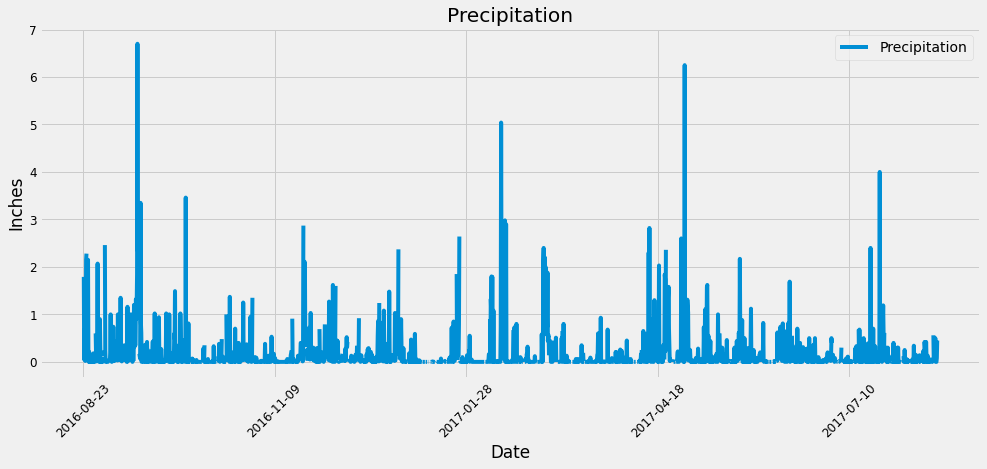

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
percip_yr = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", percip_yr)

# Perform a query to retrieve the data and precipitation scores. Needs to be greater than percip_r to find the percipitation data.
sel = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=percip_yr).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

percip_df = pd.DataFrame(sel, columns=['Date','Precipitation']).sort_values("Date",ascending=True)
percip_df.set_index('Date', inplace=True)

# Sort the dataframe by date
percip_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data

percip_df.plot(figsize=(15,6), fontsize=12, rot=45)
plt.title("Precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.savefig("Images/PRECIPITATION.png")
#plt.tight_layout()
plt.show()


In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
percip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(Station.id)).all()
print(total_stations, "total stations")


[(9,)] total stations


In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#The Most ACTIVE is [0],[0], aka USC00519281
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(lowest_temp, "degrees F is the lowest temperature for the most active station ('USC00519281')")

highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print(highest_temp, "degrees F is the highest temperature for the most active station ('USC00519281')")

avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
print( avg_temp, " degrees F is the average temperature for the most active station ('USC00519281')")


[(54.0,)] degrees F is the lowest temperature for the most active station ('USC00519281')
[(85.0,)] degrees F is the highest temperature for the most active station ('USC00519281')
[(71.66378066378067,)]  degrees F is the average temperature for the most active station ('USC00519281')


In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


results = session.query(Measurement.date, Measurement.tobs).\
                  filter(Measurement.date > percip_yr).filter(Measurement.station == 'USC00519281').all()
          
#Convert to dataframe   
temps_df = pd.DataFrame(results).set_index('date')
#temps_df



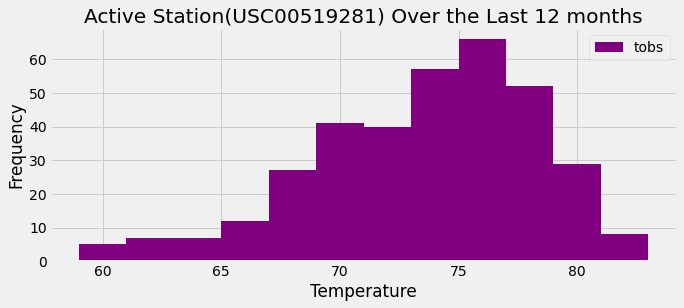

In [20]:
#HISTOGRAM

# plot the results as a histogram
plt.figure(figsize=(10,4))
plt.hist(temps_df['tobs'], bins = 12, color="purple")
plt.title("Active Station(USC00519281) Over the Last 12 months")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.savefig("Images/station-histogram.png")
plt.show()

# Close session

In [21]:
# Close Session
session.close()